# Chapter 11: Training Deep Neural Networks

- This is the 2nd chapter of the Part 2 of the book HOML
- Here, we learn about the major problems faced while training DNN, including the vanishing/exploding gradient
- This chapter is mostly theoretical concepts to understand how the problems can be dealt with in multiple ways



# Problems with Training DNN
- Following are a few of the problems that can be faced while training a DNN:
1. **Vanishing or exploding gradient**: 
    - This is when the gradient grows smaller and smaller, or larger and larger, when flowing backwards through the DNN during the training.
    - Both these problems make lower layers very hard to train
1. **Not enough training data**:
    - We may not have enough training data for such large networks or it might be costly to label
1. **Slow Training**:
    - The training might be very slow
1. **Overfitting**:
    - A model with millions of parameters would severely risk overfitting the training set

# Vanishing/Exploding Gradients Problems
- We know that the backpropogation algorithm works by calculating the gradient of the errors for the weights
- Often times, the gradient gets smaller or smaller as the algo progresses down to the lower layers
- As a result, the wights of the lower layers remain unchanged
- This is known as the ***Vanishing Gradient Problem***
- If the opposite happens, then it's called the ***Exploding Gradient Problem***

## Initial Solutions
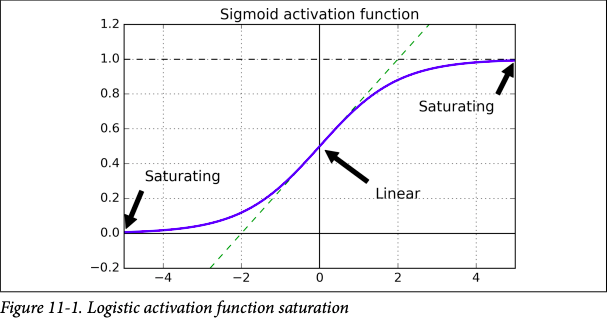
- In 2010, Xavier Glorot and Yoshua Benhio found a few suspects
    - The most popular technique was to use sigmoid function with a weight initialization technique(standard normal distribution)
    - This combination will always end up with the output variance more than the input variance
    - Going forward in the network, the variance increases after each layer until the activation function saturates at the top layer
    - This saturation is actually made worse by the fact that logistic function has a mean of 0.5
- It can be seen that the sigmoid function saturates at 0 or 1 with a derivative extremely close to 0
- Thus, when backprop kicks in, there is virtually no gradient to propogate back through the network

# Fix 1: Good Initialization
## Glorot, LeCurn and He Initialization

- In the paper, they pointed out that the signal needs to flow properly in both directions
    1. Forward direction when making predictions
    1. Backward direction when backpropogating gradients
- They argued that to stabilize the gradient:
    1. **Output variance of EACH LAYER needs to be equal to the variance of its input**
        - When you pass data through a neural network layer, each neuron's output is determined by the weights assigned to its inputs. If the weights are too large, the output variance becomes too high, risking exploding gradients during training. If the weights are too small, the output variance becomes too low, leading to vanishing gradients. Glorot initialization aims to set the weights in a way that the variance of the outputs is similar to the variance of the inputs, maintaining a stable flow of information.
    1. **The gradients need to have equal variance before and after flowing through a layer in the reverse direction**
- Both cannot be guarenteed unless the layer has equal number of inputs and neurons
    - Number of inputs are called ***fan-in*** of the layer
    - Number of neurons are called ***fan-out*** of the layer
    - ***fan-in*** means the number of input connections to a layer
    - ***fan-out*** means the number of neurons in a layer
    - The above statement means that the number of input connections should be equal to the number of neurons in the layer

### Glorot or Xavier Initialization
- Here, we randomly initialize the weights using one of the following strategies when using the logistic activation function:

<span style="color:red">NOTE that,  </span> $f_{avg} = \dfrac{f_{in} + f_{out}}{2}$
1. $$
\text{Normal distribution with mean 0 and variance } \sigma^2 = \dfrac{1}{fan_{avg}}\\
$$

1. $$
\\
\text{Uniform distribution between } \pm r \\
r = \sqrt{ \dfrac{3}{fan_{avg}} }
$$


#### Example:
- Input layer with 50 neurons ($n_{in} = 50$)
- First hidden layer with 30 neurons ($n_{out_1} = 30$)
- Second hidden layer with 20 neurons ($n_{out_2} = 20$)
- Third hidden layer with 10 neurons ($n_{out_3} = 10$)
- Output layer with 5 neurons

1. **From Input to the first hidden layer**
$$
W_1 \sim \mathcal{N}(0, \dfrac{2}{50+30})
$$
1. **From the first hidden layer to the second hidden layer**
$$
W_2 \sim \mathcal{N}(0, \dfrac{2}{30+20})
$$

1. **From the second hidden layer to the third hidden layer**
$$
W_2 \sim \mathcal{N}(0, \dfrac{2}{20+10})
$$

1. **From the third hidden layer to the output layer**
$$
W_2 \sim \mathcal{N}(0, \dfrac{2}{10+50})
$$

### LeCun Initialization

- Here, we randomly initialize the weights using one of the following strategies when using the logistic activation function:

1. $$
\text{Normal distribution with mean 0 and variance } \sigma^2 = \dfrac{1}{fan_{in}}\\
$$

1. $$
\\
\text{Uniform distribution between } \pm r \\
\\
r = \sqrt{ \dfrac{3}{fan_{in}} }
$$


- LeCun initialization is equal to Glorot/Xavier initialization when $fan_{in} = fan_{out}$

### He Initialization
1. $$
\text{Normal distribution with mean 0 and variance } \sigma^2 = \dfrac{2}{fan_{in}}\\
$$


## Summary
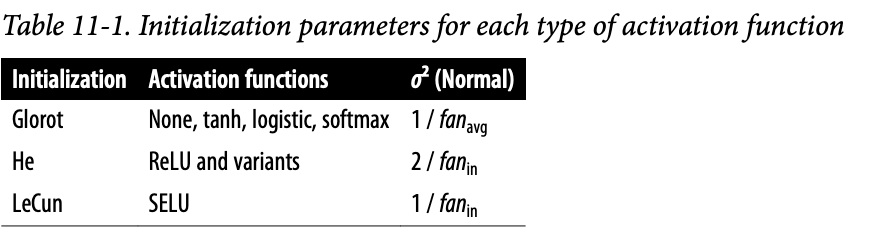

## Good Initializations in Keras

- By default, keras uses Glorot Initialization with uniform distribution


In [6]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras 

2024-01-04 23:21:19.565440: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [8]:
# To use HE Initialization with normal distribution
he_normal_layer = keras.layers.Dense(10, activation='relu', kernel_initializer='he_normal')

# To use HE Initialization with uniform distribution
he_uniform_layer = keras.layers.Dense(10, activation='relu', kernel_initializer='he_uniform')

In [10]:
he_normal_layer.kernel_initializer

In [11]:
he_uniform_layer.kernel_initializer

In [14]:
# To use Glorot/Xavier initialization with normal distribution
glorot_normal_layer = keras.layers.Dense(10, activation='sigmoid', kernel_initializer='glorot_normal')

- To use He initialization with a uniform distribution but based on $f_{avg}$ instead of $f_{in}$, we can use the VarianceScaling initializer like this:

In [16]:
# We can play with the parameters here
he_avg_init = keras.initializers.VarianceScaling(scale=2, mode='fan_avg', distribution='uniform')
he_avg_layer = keras.layers.Dense(10, activation='relu', kernel_initializer=he_avg_init)

In [17]:
he_avg_layer.kernel_initializer

# Fix 2: Good Activation Functions
- Activation functions which are non-saturating
- Biological NN uses sigmoid like function
    - Not the best choice for ANN, due to the saturating nature

## ReLU
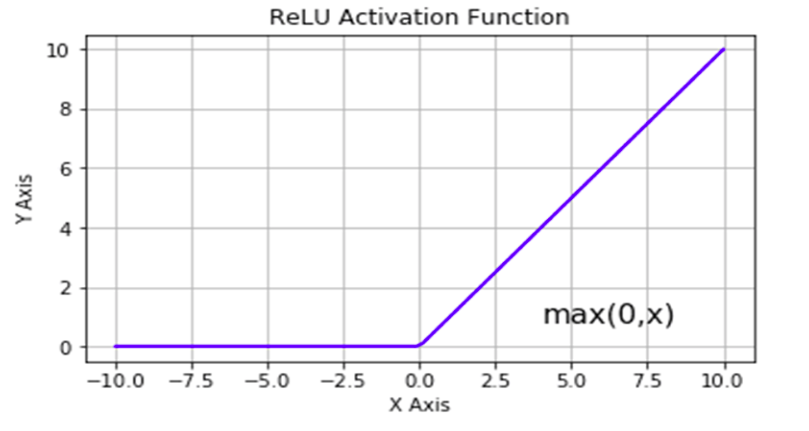
- Rectified Linear Unit
- A much better choice as it doesn't saturate for positive values
- BUT, IT'S NOT PERFECT
- Suffers from the problem of ***dying ReLU***
    - During training, some neurons "die"
    - Meaning, they stop outputting anything other than a $0$
    - In some cases, we may find that half of your network's neurons are dead, especially if we use large learning rate
    - A neuron dies when the weights get tweaked in a way that the weighted sum of its input are negative for all instances in the training set
    - In this case, the gradient for the ReLU would be 0 when the input is negative
    - And therefore, the gradient descent does not affect the neuron
- A dead neuron may come back to life if it's in the first hidden layer
- Let's look at a few varients of ReLU

### Leaky ReLU
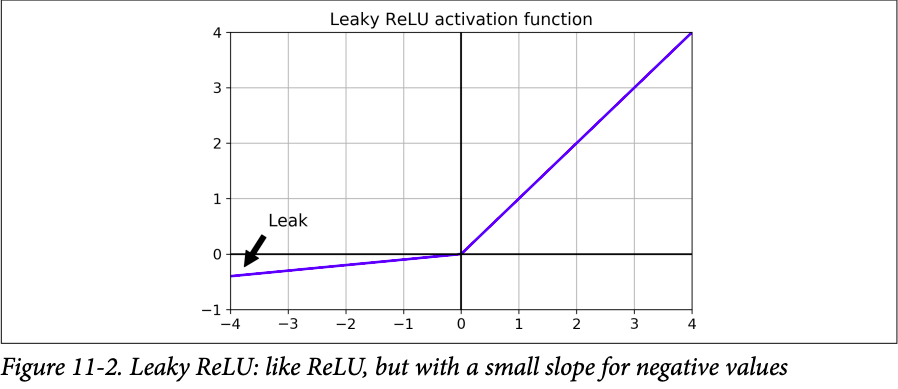
- To solve the problem of dying ReLU, we have a variant of ReLU known as the ***Leaky ReLU***
- Leaky ReLU is defined as:$$
LeakyReLU_\alpha(z) = \max(\alpha z, z)
$$
- The HP $\alpha$ defines how much the function "leaks"
    - Typically set to $0.01$
- This ensures that the leaky ReLU's never die. They can go into a long comma but they might wake up

- **Leaky ReLU** >> **Strict ReLU**
- At times, the leak set to 0.2(huge leak) might perform better than 0.01(small leak)

### RRELU
- Randomized **Leaky** Rectified Linear Units
- $\alpha$ is picked randomly in a given range during training and is fixed to tan avg value during the testing
- Better than ReLU
- Acts as a regularizer
    - Avoids the risk of overfitting

### PReLU
- Parametric Leaky ReLU
- $\alpha$ is authorized to be learned during training, modified during the backpropogation.
- PReLU strongly ooutperforms ReLU on large image datasets
- On small datasets, it might overfit


## ELU
- Exponential Linear Unit
- Introduced in 2015
- In the published paper, it outperformed all the varients of ReLU
    - Training time was reduced
    - Performed better on the test set

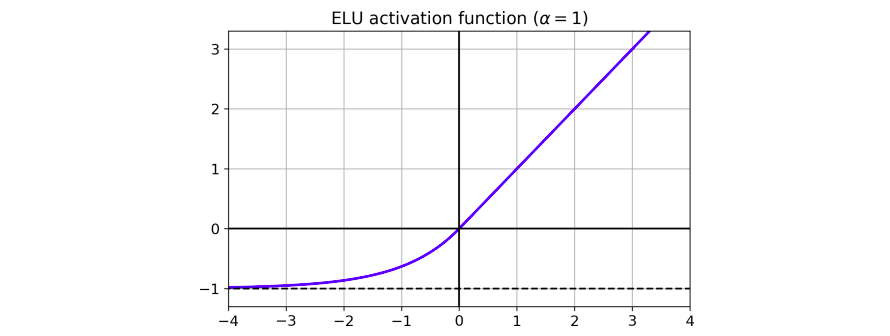
$$
ELU_{\alpha}(z) =\begin{cases}
\alpha ( \ exp\ ( z) -1) & \mathrm{if,} \ z< 0\\
z & \mathrm{if,} \ z\geqslant 0
\end{cases}
$$

- Looks like ReLU but with few major differences:
    1. It takes on negative values when z < 0, which allows the unit to have an average output closer to 0 and helps alleviate the vanishing gradients problem. The hyperparameter α defines the value that the ELU function approaches when z is a large negative number. It is usually set to 1, but you can tweak it like any other hyperparameter.
    1. It has a nonzero gradient for z < 0, which avoids the dead neurons problem
    1. If α is equal to 1 then the function is smooth everywhere, including around z = 0, which helps speed up Gradient Descent since it does not bounce as much to the left and right of z = 0.

- Main drawback of ELU is that it is slower to compute than the ReLU function and its variants
    - Due to the use of the exponential function
- Its faster convergence rate during traianing compensates for the slow computation
    - But still, at times, ELU network will be slower than ReLU network

## SELU
- Scaled ELU
- Introduced in 2017
- If all the hidden layers use SELU, the network will ***self-normalize***
    - This means that the output of each layer will tend to preserve mean 0, var 1 during training
    - This solves the vanishing/exploding gradient problem
- As a result, ***SELU*** activation function outperforms any other activation function

### Conditions for Self-Normalization to happen
1. Input features must be standardized
1. Every hidden layers' weights must be initialized using LeCun Normal initialization
    - In keras, set ```kernel_initializer="lecun_normal"```
1. Network's arch must be sequential.
    - If we try to use SELU with non-sequential networks which skip connections(wide-and-deep NN, RNN, etc), self-normalization will not be guaranteed!!
        - So, SELU might not outperform other activation functions

## Summary
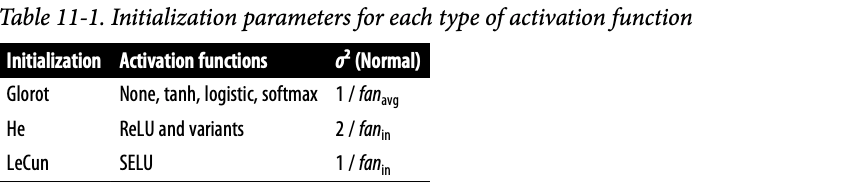

- In general, follow the sequence:
    - **SELU > ELU > Leaky ReLU (and variants) > ReLU > tanh > logistic**

- If self-normalization is prevented by the network, try **ELU**
    - Might outperform SELU as SELU is not smooth at z=0

- If you care a lot about runtime latency, try **Leaky ReLU**

- If spead is the priority, **ReLU** might be the best choice

## Using it in Keras
- To use Leaky ReLU in keras, create a LeakyReLU layer and add it to the model just AFTER the layer you want to apply it to


In [21]:
# LEAKY ReLU

model = keras.models.Sequential([
    keras.layers.Input(shape=[8]),
    keras.layers.Dense(30, kernel_initializer='he_normal'),
    keras.layers.LeakyReLU(alpha=0.2), # After the hidden layer 1
    keras.layers.Dense(20, kernel_initializer='he_normal'),
    keras.layers.LeakyReLU(alpha=0.2), # After the hidden layer 2
    keras.layers.Dense(1)
    
])

In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 30)                270       
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 30)                0         
                                                                 
 dense_12 (Dense)            (None, 20)                620       
                                                                 
 leaky_re_lu_3 (LeakyReLU)   (None, 20)                0         
                                                                 
 dense_13 (Dense)            (None, 1)                 21        
                                                                 
Total params: 911
Trainable params: 911
Non-trainable params: 0
_________________________________________________________________


In [23]:
# Parametric ReLU

model = keras.models.Sequential([
    keras.layers.Input(shape=[8]),
    keras.layers.Dense(30, kernel_initializer='he_normal'),
    keras.layers.PReLU(), # After the hidden layer 1
    keras.layers.Dense(20, kernel_initializer='he_normal'),
    keras.layers.PReLU(), # After the hidden layer 2
    keras.layers.Dense(1)
    
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 30)                270       
                                                                 
 p_re_lu (PReLU)             (None, 30)                30        
                                                                 
 dense_15 (Dense)            (None, 20)                620       
                                                                 
 p_re_lu_1 (PReLU)           (None, 20)                20        
                                                                 
 dense_16 (Dense)            (None, 1)                 21        
                                                                 
Total params: 961
Trainable params: 961
Non-trainable params: 0
_________________________________________________________________


In [24]:
# SELU
# Set activation to selu with lecun_normal kernel initializer
model = keras.models.Sequential([
    keras.layers.Input(shape=[8]),
    keras.layers.Dense(30, activation='selu', kernel_initializer='lecun_normal'),
    keras.layers.Dense(20, activation='selu', kernel_initializer='lecun_normal'),
    keras.layers.Dense(1)
    
])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 30)                270       
                                                                 
 dense_18 (Dense)            (None, 20)                620       
                                                                 
 dense_19 (Dense)            (None, 1)                 21        
                                                                 
Total params: 911
Trainable params: 911
Non-trainable params: 0
_________________________________________________________________


# FIX 3: Batch Normalization
- He initialization + ELU (or any ReLU variant) helps a lot with the vanishing gradient problem at the beginning of the training
    - But, it does not guarantee that they wont come back during training
- BN was introduced in 2015 to address the problem
- How the technique works is by adding an operation in the model just BEFORE or AFTER the activation function of each of the hidden layer
- The operation simply zero-centers and normalizes each input and then scales and shifts the result using two new parameter vectors per layer
    1. One for scaling
    1. Other for shifting
- In other words, the operation lets the model learn the optimal scale and mean of each ofthe layer's input
- In many cases, if you add a BN layer as the very first layer of your NN, you don't need to standardize your training set(like, using StandardScaler)
    - The BN layer will do it for you
    - But, approximately, since it only looks at one batch at a time
    
- In order to zero-center and normalize the inputs, the algorithm needs to estimate each input's mean and standard deviation. 
    - It does so by evaluating the mean and standard deviation of the input over the current mini-batch
    
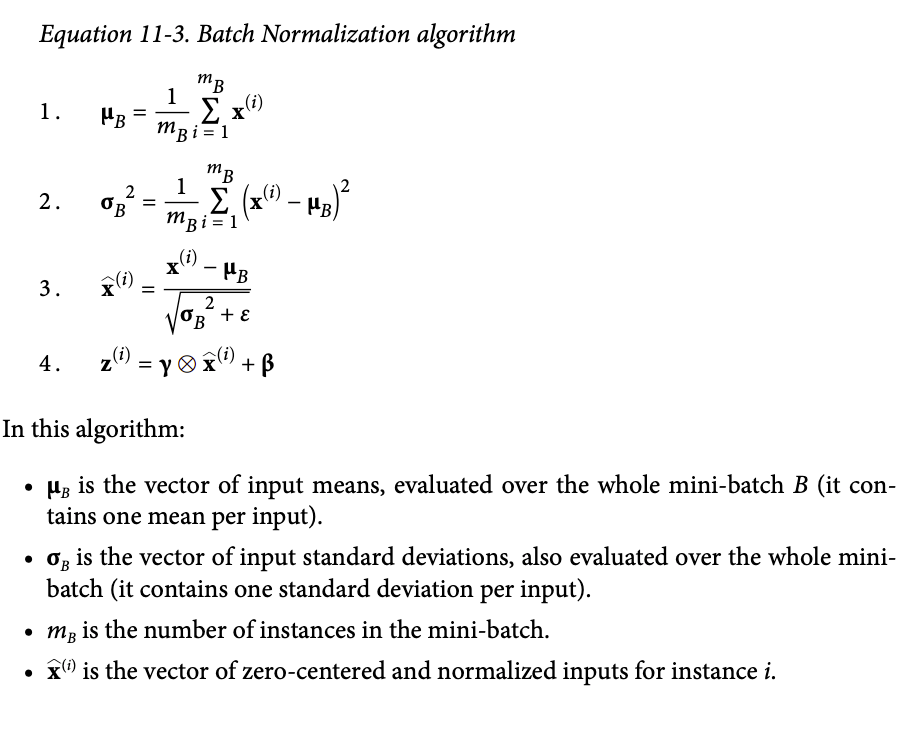
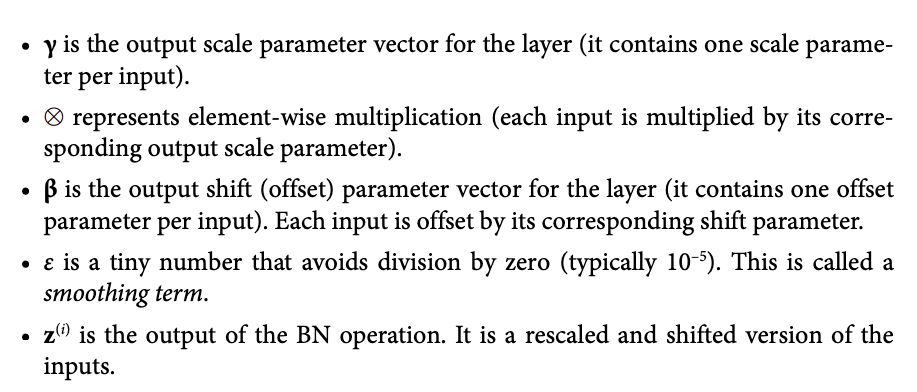

## BN parameters for testing
- During testing, we wouldn't have a batch to estimate the parameters
- One solution is to wait till the end of the training, then run the entire training set through the NN and compute the mean and SD of each input of the BN layer
- These final mean and SD can be used duringthe prediction
- However, most implementations of BN estimate these final params during training using a **moving average** of the layer's input means and SD
- Keras does this automatically as well

## Summary
- In summary, 4 parameter vectors are learned during the training:
    1. $\pmb{\gamma}$: output scale vector
        - Learned through regular backpropogation
    1. $\pmb{\beta}$: output offset vector
        - Learned through regular backpropogation
    1. $\pmb{\mu}$: Input mean vector
        - Learned through exponential moving average
    1. $\pmb{\sigma}$: Input SD vector
        - Learned through exponential moving average


## Other features of BN
- Acts as a regularizer
- Reduces vanishing gradient so much that we can also use saturating activation functions like tanh, sigmoid
- Can use large learning rate to speed up the learning process significantly

## Few points to keep in mind about BN
- Adds complexity to the model
- Adds a runtime penalty
    - Slower predictions due to extra computations at each layer
- Fortunately, it is possible to fuse the BN layer with the previous layer, after the training, thereby avoiding the runtime penalty
    - To do so, calculate a new weight vector as follows:

$$
{ W' = \dfrac{\gamma \otimes W}{\sigma} }
\\
$$
and we can calculate bias vector as following:
$$
{ b' = \dfrac{\gamma \otimes (b-\mu)}{\sigma + \beta} }
$$
This simplifies the equation as:
$$
XW' + b'
$$

## BN in Keras

- Just add a BN layer before or after each of the hidden layer's ACTIVATION FUNCTION
- Mostly can use the default HPs
- May need to tweak the ```momentum```
    - A good momentum is close to 1: 0.9, 0.99, etc


In [25]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(), # BN layer after input; normalizes the input
    keras.layers.Dense(300, activation='elu', kernel_initializer='he_normal'),
    keras.layers.BatchNormalization(), # BN layer after hidden layer 1
    keras.layers.Dense(100, activation='elu', kernel_initializer='he_normal'),
    keras.layers.BatchNormalization(),# BN layer after hidden layer 2
    keras.layers.Dense(10, activation='softmax')
])

In [26]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 batch_normalization (BatchN  (None, 784)              3136      
 ormalization)                                                   
                                                                 
 dense_20 (Dense)            (None, 300)               235500    
                                                                 
 batch_normalization_1 (Batc  (None, 300)              1200      
 hNormalization)                                                 
                                                                 
 dense_21 (Dense)            (None, 100)               30100     
                                                                 
 batch_normalization_2 (Batc  (None, 100)             

- 4 params per input, $\gamma, \beta, \mu, \sigma$:
    - $4\times 784 = 3136$
- Last 2 params are moving averages, so Keras call them "Non-trainable"
    - $(3136+1200+400)/2 = 2368$

In [28]:
# Looking at the variables in the first layer

[(var.name, var.trainable) for var in model.layers[1].variables]

[('batch_normalization/gamma:0', True),
 ('batch_normalization/beta:0', True),
 ('batch_normalization/moving_mean:0', False),
 ('batch_normalization/moving_variance:0', False)]

- Authors of the BN paper argue that we should add the BN layer before the activation, as supposed to how we did just now

In [33]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(), # BN layer after input; normalizes the input
    keras.layers.Dense(300, kernel_initializer='he_normal'),
    keras.layers.BatchNormalization(), # BN layer after hidden layer 1, before activation
    keras.layers.Activation('elu'), # Activation after the BN
    keras.layers.Dense(100, kernel_initializer='he_normal'),
    keras.layers.BatchNormalization(),# BN layer after hidden layer 2, before activation
    keras.layers.Activation('elu'), # Activation after the BN
    keras.layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 batch_normalization_12 (Bat  (None, 784)              3136      
 chNormalization)                                                
                                                                 
 dense_29 (Dense)            (None, 300)               235500    
                                                                 
 batch_normalization_13 (Bat  (None, 300)              1200      
 chNormalization)                                                
                                                                 
 activation_2 (Activation)   (None, 300)               0         
                                                                 
 dense_30 (Dense)            (None, 100)              

- Since the BN layer has an offset param per input, we can remove the bias terms from the previous layers
- just use like this:
```python
...
    keras.layers.Dense(300, kernel_initializer='he_normal', use_bias=False),
...
```


# Fix 4: Gradient Clipping
- Clip the gradient during backpropogation so that it doesn't exceed a set threshold
- Most often used in RNN as BN is tricky with RNNs

## Implementing in Keras
- SImply set ```clipvalue``` or ```clipnorm``` arguments when creating an optimizer

In [35]:
optimizer = keras.optimizers.SGD(clipvalue=1.0)
optimizer

- The optimizer will clip each and every value between $\pm 1$
- This may change the orientation of the gradient vector
    - Example: $[0.9, 100.0] \rightarrow [0.9, 1.0]$
- That's why we should use ```clipnorm``` argument
    - Clips the gradient if its $\ell_2$ norm is greater than the threshold
    - Example: $[0.9, 100.0] \rightarrow [0.00899, 0.9999]$ for ```clipnorm=1.0```


# Fix 5: Re-Using Pretrained Layers
- In general, not a good idea to train large DNN from scratch
- Can use the weights from DNNs that were trained for a similar task
    - Will learn in chapter 14, how to find such models
- Reuse lower layers of the network which accomplishes a similar task
- This is known as ***transfer learning***
- Speeds up training, requires less training data as well

***Example:***
- You have a model that can classify pictures into 100 different categories including animals, plants, vehicles, and everyday objects
- You now want to train a DNN to classify specific types of vehicles
- These tasks are very much similar, even partly overlapping

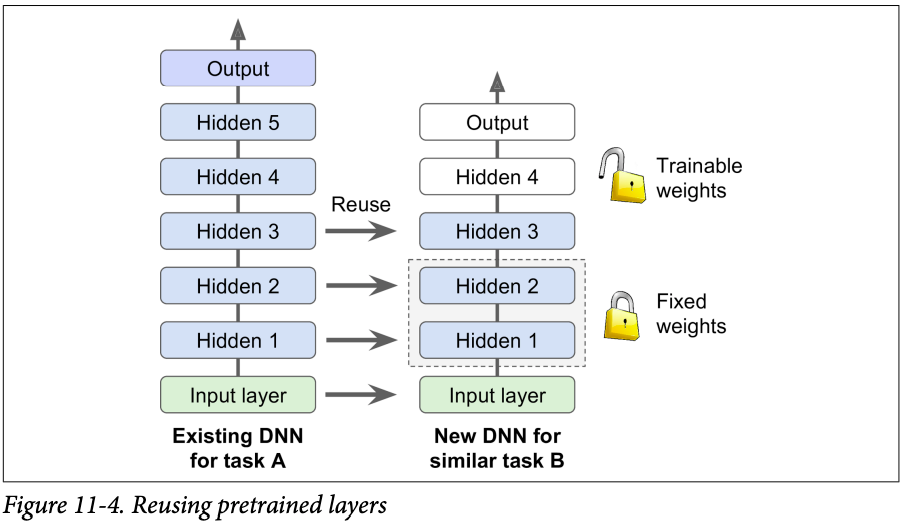

> If the input pictures of your new task don’t have the same size as the ones used in the original task, you will usually have to add a preprocessing step to resize them to the size expected by the original model. More generally, transfer learning will work best when the inputs have similar low-level features.

> More similar the tasks are, more layers you can reuse, starting with the lowest layers

> For very similar tasks, try using all hidden layers and just replacing the output layer

***
- Try freezing all the reused layers first, then train your model and see how it performs
- Then try unfreezing one or two layers at a time from the top and then train
- Repeat

- If it still doesn't give a good performance, try dropping the top hidden layers and then freeze everything again
- Iterate until you reach a good performance
***


## Transfer Learning with Keras

- Say you have a model_A from which you can use the layers in a new model, model_B
- Follow the following python code:

In [38]:
model_A = model # Or load a model using keras.models.load_model()

model_B_on_A = keras.models.Sequential(model_A.layers[:-1])

In [39]:
model_B_on_A.add(keras.layers.Dense(1, activation='sigmoid'))

- NOTE THAT, you cannot merge the 2 steps using the list method for layers
- You need to add the other layers later on, once you have added the layers to reuse
- ALSO, when you train model_B_on_A, it will also affect the model_A
    - To avoid this, we need to clone the model_A before reusing the layers

In [41]:
model_A_clone = keras.models.clone_model(model_A) # Cloning the model

model_A_clone.set_weights(model_A.get_weights()) # Reusing the weights because cloning doesn't copy that

In [42]:
model_B_on_A = keras.models.Sequential(model_A_clone.layers[:-1])
model_B_on_A.add(keras.layers.Dense(1, activation='sigmoid'))


- Now, we need to freeze the layers
> NOTE THAT, after freezing and unfreezing any layers in a model, we need to re-compile the model to use

In [44]:
for layer in model_B_on_A.layers[:-1]:
    layer.trainable = False

In [45]:
model_B_on_A.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

### Something's Fishy

- This method gave good results in this case, as per the books
- BUT, this trick does not actually help much and often downgrades the performance
- It turns out that Transfer Learning doesn't work very well with small dense networks
- It works best with CNN models

## Unsupervised Pretraining
- When tackling a complex problem but not enough data to train
- Often easy to gather unlabelled data and then labelling them is expensive
- Train an ensupervised model on the unlabelled data: like autoencoders or GAN
- Then, re-use the lower layers of the autoencoder or GAN's discriminator
    - Add the output layer and fine-tune the final model using supervised learning with the labelled examples
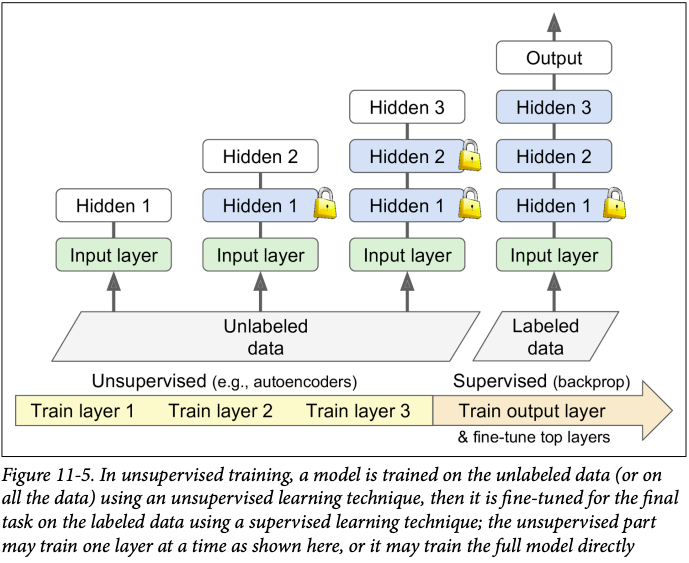
- A technique known as the ***greedy layer-wise pretraining*** (above figure) was used earlier
    - Train unsupervised model with 1 layer, typically an RBM(restricted Boltzmann Machine)
    - Freeze the layer
    - Train again with 2 layers
    - Freeze both the layers
    - Train again witha 3rd layer
    - Repeat
- Now, we can train the entire model at once, that too using autoencoders and GANs


## Pretraining on an Auxilary Task
- When limited labelled data, another way is to train an aux task NN for which we can get the data easily. Then, reuse the lower layers for the actual task
- Useful in NLP

***Example***
- You want to build a model to recognize faces
- Data is limited
- Train an aux task to detect if two different pictures feature the same person or not
- Use the lower layers to build the main model



# Fix 6: Faster Optimizers


- Using a good optimizer can boost up the training and help fix the vanishing gradient problem
- We will look at the most popular optimizers:
    - Momentum Optimization
    - Nesterov Accelerated Gradient
    - AdaGrad
    - RMSProp
    - Adam and Nadam Optimizations
    

## Momentum Optimization

- Imagine a ball rolling down a slope. It will start out slow and quickly pick up momentum until it eventually reaches terminal velocity
    - This is the simple idea behind ***momentum optimization***
- Reguilar GD takes regular fixed steps so it'll take more time to converge to the solution
- GD works with the following update rule:
$$
\theta := \theta - \eta \nabla_\theta J(\theta)
$$
- This equation does not care about what the earlier gradients were
- Momentum optimization cares a lot about what previous gradients were: 
    - At each iteration, it subtracts the local gradient from the *Momentum Vector*, $\pmb{m}$(multiplied by the learning rate $\eta$)
    - It then updates the weights by adding this momentum vector, as in the given equation
    
$$
1)\hspace{10pt}m := \beta m - \eta \nabla_\theta J(\theta)
\\
2)\hspace{10pt}\theta := \theta + m
$$

- In other words, the gradient is used for accelration and not for speed.
- $\beta$ acts as a friction hyperparameter, called the momentum
    - 0 means high friction
    - 1 means no friction
    - Usually set to 0.9
    
- The terminal velocity (maximum size of the weight updates) is equal to
$$
gradient \times \eta \times \dfrac{1}{1-\beta}
$$

- Example:
    - If $\beta=0.9$, we get $\implies$ $10\times gradient\times \eta$
    - THat means, momentum optimization goes 10 times faster than the regular GD
- Allows the MO to escape plateau much faster than regular GD
- When we dont use BN layers for the inputs(the inputs wont be normalized), using MO helps a lot
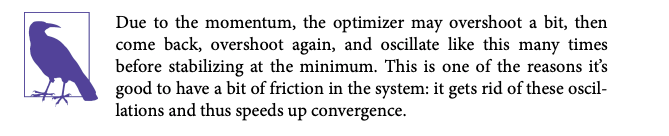


### Using Momentum Optimization in keras:
- SImply set the momentum parameter ($\beta$) in the same optimizer for SGD

In [47]:
optimizer = keras.optimizers.SGD(learning_rate=1e-3, momentum=0.9)

## Nesterov Accelerated Gradient (NAG)
- Small varient of MO
- Also known as ***Nesterov Momentum Optimization***
- Faster than vanilla MO
- It measures the gradient of the cost function not at the local position $\theta$ but slightly ahead in the direction of the momentum, at $\theta + \beta m$
$$
1) \hspace{10pt}m := \beta m - \eta \nabla _\theta J(\theta + \beta m)
\\
2) \hspace{10pt}\theta := \theta + m
$$

- This small tweak works because the direction is correct and we are taking a slightly larger step in the correct direction
- NAG helps reduce oscillations and thus converges faster
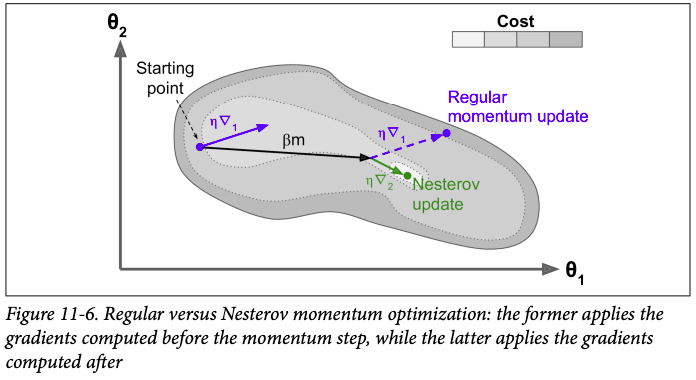

### NAG in Keras
- set the parameter ```nesterov=True```

In [48]:
optimizer = keras.optimizers.SGD(learning_rate=1e-3, momentum=0.9, nesterov=True)

## AdaGrad
- Adaptive Gradient
- Consider the elongated bowl problem again: GD starts quickly by going down the steepest slope which does not opint straight towards the global optimum, then it very slowly goes down to the bottom of the valley
- What if we could directly point to the right direction?
- *AdaGrad* algorithm achieves this correction by scaling down the gradient vector along the steepest dimension
- Algorithm:
$$
1)\hspace{10pt} s := s + \nabla _\theta J(\theta) \otimes \nabla _\theta J(\theta)
\\
2)\hspace{10pt} \theta := \theta - \eta \nabla _\theta J(\theta) \oslash \sqrt{s + \epsilon}
$$

- $\otimes$ is element wise multiplication
- $\oslash$ is element wise division
- Step 1 accumulates the square of the gradients into the vector $s$
    - Each $s_i$ accumulates the square fo the partial derivative of the cost function wrt the parameter $\theta_i$
    - If the cost function is steep along the $i^{th}$ dimension, then $s_i$ will grow larger and larger at each iteration
- Step 2 is almost identical to GD, but with one big difference: Gradient vector is scalled down by a factor of $\sqrt{s + \epsilon}$
    - $\epsilon$ is the smoothing term to avoid division by zero, typically set to $10^{-10}$
***  
- In short, the algorithm decays the LR, but it does so faster for steep dimensions than for dimensions with gentler slopes
- This is called ***Adaptive Learning Rate***
- One more benefit is that it requires very less tuning of the LR HP $\eta$
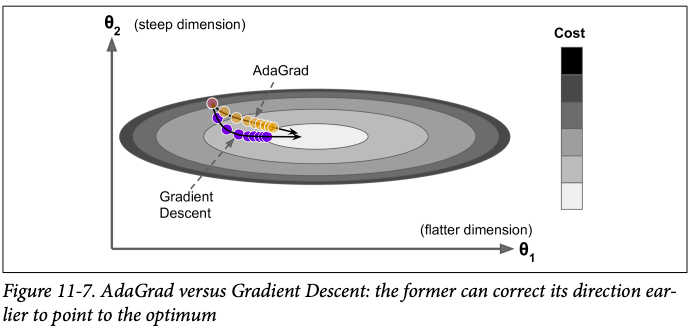

### Points to Note
- Performs well for simple quadratic problems
- Often stops too early when training NN
- Stops way before reaching global optimum
- Should not use AdaGrad optimizer
- But we study it to help us understand other adaptive LR optimizers
### Keras Implementation

In [50]:
optimizer = keras.optimizers.Adagrad(learning_rate=0.001)

## RMSProp
- Root Mean Squared Propogation
- Derivation of AdaGrad
- Instead of taking all the gradients into consideration, it takes only the gradients from the most recent iterations.
    - It does so by using exponential decay in the first step
    
$$
1) \hspace{10pt} s:= \rho s + (1-\rho) \nabla _\theta J(\theta) \otimes \nabla _\theta J(\theta)
\\
2)\hspace{10pt} \theta := \theta - \eta \nabla _\theta J(\theta) \oslash \sqrt{s + \epsilon}
$$

- Decay rate $\rho$(rho) is set typically set to 0.9
- A new HP but the default value often works well

### Keras implementation

In [49]:
optimizer = keras.optimizers.RMSprop(learning_rate=1e-3, rho=0.9)

## Adam Optimizations
- ADAptive Moment Estimate
- Combines the idea of MO and RMSProp
- Just like MO, it keeps track of an exponentially decaying average of past gradients
- And just like RMSProp, it keeps track of an exponentially decaying average of past squared gradients

$$
1) \hspace{10pt} m := \beta_1 m - (1-\beta_1)\nabla_\theta J(\theta)
\\
2) \hspace{10pt} s := \beta_2 s + (1-\beta_2)\nabla_\theta J(\theta) \otimes \nabla_\theta J(\theta)
\\
3) \hspace{10pt} \hat{m} := \dfrac{m}{1-\beta_1^t}
\\
4) \hspace{10pt} \hat{s} := \dfrac{s}{1-\beta_2^t}
\\
5) \hspace{10pt} \theta := \theta + \eta \hat{m} \oslash \sqrt{\hat{s} + \epsilon}
$$

- $t$ represents the iteration number starting at 1
- Just the steps 1, 2 and 5 look very similar to both, MO and RMSProp
- Steps 3 and 4 are somewhat of a technical detail: since $m$ and $s$ are initialized to 0, they will be biased towards 0. 
    - These two steps will help boost $m$ and $s$ at the beginning of the training
- $\beta_1$ is the momentum decay HP, usually set to 0.9
- $\beta_2$ is the scaling decay HP and is often initialized to 0.999
- Default values mostly work fine without HP tuning.

### Keras Implementation

In [51]:
optimizer = keras.optimizers.Adam(learning_rate=1e-3, beta_1=0.9, beta_2=0.999)

## AdaMax: Variant of Adam Optimization
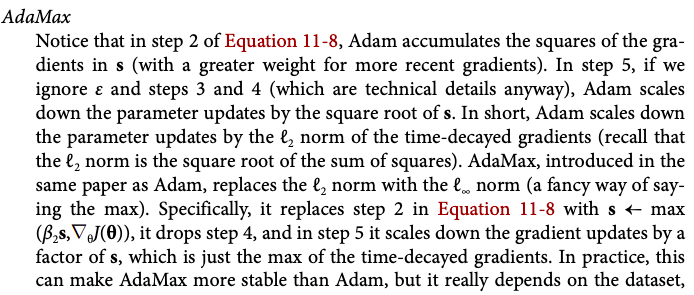
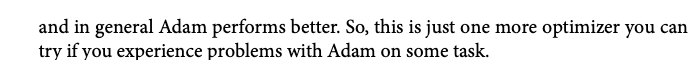

### Keras Implementation

In [54]:
optimizer = keras.optimizers.Adamax(learning_rate=1e-3, beta_1=0.9, beta_2=0.999)

## Nadam: Variant of Adam Optimization

- Nadam is Adam + Nesterov Trick
- Often converges slightly faster than adam
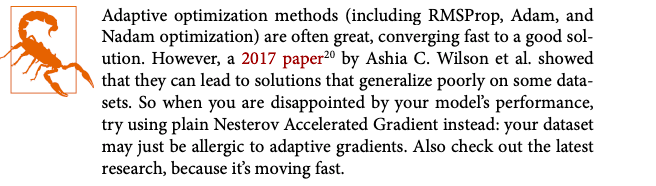

### Keras Implementation

In [55]:
optimizer = keras.optimizers.Nadam(learning_rate=1e-3, beta_1=0.9, beta_2=0.999)

## Optimizer Comparison

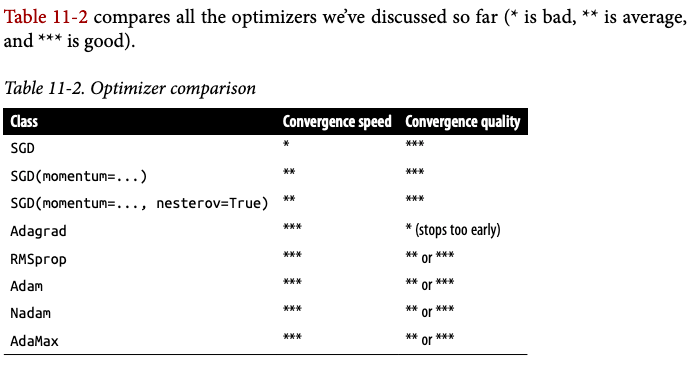

## Learning Rate Scheduling

- It is important to find a good learning rate
- Large LR $\implies$ training may diverge
- Small LR $\implies$ training may take very long to converge
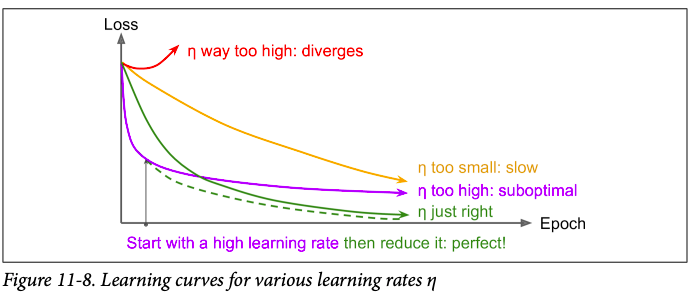

- One option is to use a constant LR, but there are other better strategies to use. 
    - These strategies are called ***learning schedules***


### Power Scheduling

- Set the LR to a function of the iteration number $t$

$$
t: \eta(t) = \dfrac{\eta_0}{\left( 1+ \dfrac{t}{s}\right)^c}
$$

- HPs:
    - $\eta_0$: initial LR
    - $c$: power (typically set to 1)
    - $s$: steps
- After $s$ step, it goes down by $\dfrac{\eta_0}{2}$
- AFter $s$ more steps, it goes down by $\dfrac{\eta_0}{3}$, then $\dfrac{\eta_0}{4}$ and so on

#### Keras Implementation

##### Epochs vs Steps
- An epoch consists of one full cycle through the training data. 
- This is usually many steps. 
- As an example, if you have 2,000 images and use a batch size of 10 
    - an epoch consists of 2,000 images / (10 images / step) = 200 steps.

In [61]:
# DEPRECATED:
# ```decay = 1/s``` (s is the number of steps it takes to divide the LR by one more unit)
# In Keras, c=1
optimizer = tf.keras.optimizers.legacy.SGD(learning_rate=0.01, decay=1e-4)

In [65]:
# RECOMMENDED:
# learning_rate = initial_learning_rate / (1 + (decay_rate * step) / decay_steps)**power
# power = 1
lr_schedule = tf.keras.optimizers.schedules.InverseTimeDecay(
    initial_learning_rate=0.01,
    decay_steps=10_000,
    decay_rate=1.0,
    staircase=False
)
optimizer = tf.keras.optimizers.SGD(learning_rate=lr_schedule)

In [66]:
10_000

10000

### Exponential Scheduling

- Set the LR to 
$$
\eta(t) = \eta_0 0.1^{t/s}
$$

- After every $s$ steps, the LR reduces by a factor of 10
- Constant slashing of the LR

#### Keras Implementation: 2 ways

In [78]:
# Calculates: initial_learning_rate * decay_rate ^ (step / decay_steps)
len_X_train = 10_000
s = 20 * len_X_train  // 32 # batch size = 32; number of steps in 20 epochs
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate=0.01,
                                                             decay_steps=s, # steps
                                                             decay_rate=0.1,
                                                             staircase=False
                                                            )
optimizer = tf.keras.optimizers.SGD(learning_rate=lr_schedule)

In [73]:
# Another manual way to do the same
# Need to define a function

def exp_decay_fn(epoch):
    return 0.01 * 0.1**(epoch/20)


# If dont want to hardcode the LR_0 and steps s

def exp_decay(lr0, s):
    def exp_decay_fn(epoch):
        return lr0 * 0.1 ** (epoch / s)
    return exp_decay_fn



In [71]:
# To use it, create a LR Schedule callback and use with the .fit() method

exp_decay_fn =  exp_decay(1e-2, s=20)

lr_schedule = keras.callbacks.LearningRateScheduler(exp_decay_fn)


```python
history = model.fit([...], callbacks=[lr_schedule])
```

- The LearningRateScheduler will update teh optimizer's LR attribute at the beginning of each epoch
- It updates the LR once per epoch
- Can write custom callbacks as well, [can check the same heading for custom callback scheduler implementation](https://github.com/ageron/handson-ml3/blob/main/11_training_deep_neural_networks.ipynb)

### Piecewise Constant Scheduling

- Use a constant LR for a number of epochs
- Then a smaller LR for another number of epochs
- And so on...

#### Keras Implementation

In [74]:
# Use 0.01 LR for the first 50_001 steps, 
# then 0.005 till 80_000
# then0.001 for the rest
lr_schedule = tf.keras.optimizers.schedules.PiecewiseConstantDecay(
    boundaries=[50_000, 80_000],
    values=[0.01, 0.005, 0.001]
)
optimizer = tf.keras.optimizers.SGD(learning_rate=lr_schedule)

In [76]:
# Can also implement manually similar to Exponential scheduling

def piecewise_constant_fn(epoch):
    if epoch < 5:
        return 0.01
    elif epoch < 15:
        return 0.005
    else:
        return 0.001
    
# Then we can follow similar above steps, as in exp-scheduling

### Performance Scheduling

- Checks the validation error every N steps
- Reduce the LR by a factor of $\lambda$ when the error stops dropping
- Use like callbacks

#### Keras Implementation

In [79]:
# Reduces by a factor of 0.5 if for 5 iterations, the error does not drop
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=5)

### 1Cycle Scheduling

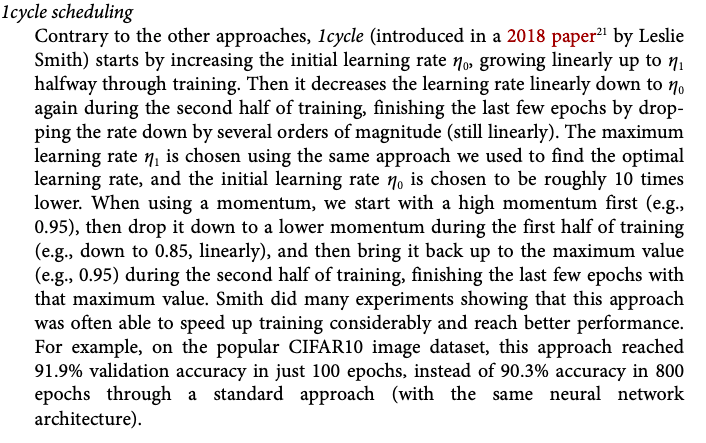

# Avoiding Overfitting Through Regularization


- Early stopping: One of the best regularization techniques
- Batch Normalization acts as a regularizer as well
- Let's look at other techniques that can be used to normalize the model layers to avoid overfitting
    1. $\ell_1$ and $\ell_2$ regularization
    1. Dropouts
    1. max-norm regularization


## $\ell_2$ Regularization
- Follows l2 norm, similar to how we have studied before
- Squared norm
- Ridge


In [80]:
layer = keras.layers.Dense(100, activation='elu',
                           kernel_initializer="he_normal",
                           kernel_regularizer=keras.regularizers.l2(0.01) # regularization factor lambda set to 0.01
                          )

## $\ell_1$ Regularization
- Follows l1 norm, similar to how we have studied before
- Absolute norm
- LASSO

In [82]:
layer = keras.layers.Dense(100, activation='elu',
                           kernel_initializer='he_normal',
                           kernel_regularizer=keras.regularizers.l1(0.01) # regularization factor lambda set to 0.01
                          )

## $\ell_1 - \ell_2$ Regularization

- Both together

In [83]:
layer = keras.layers.Dense(100, activation='elu',
                           kernel_initializer='he_normal',
                           kernel_regularizer=keras.regularizers.l1_l2(l1=0.01, l2=0.01) # regularization factors lambda1 and lambda2 set to 0.01
                          )

### Saving time with smart coding
- SInce we would want to use the same regularization to allthe layers, we might find ourself repeating the code
- This makes it error prone and ugly
- We can follow this:

In [85]:
from functools import partial

In [86]:
RegularizedDense = partial(keras.layers.Dense,
                           activation='elu',
                           kernel_initializer = 'he_normal',
                           kernel_regularizer = keras.regularizers.l1(0.01)
                          )

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    RegularizedDense(300),
    RegularizedDense(100),
    RegularizedDense(10, activation='sigmoid', kernel_initializer='glorot_uniform')
])

In [88]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_38 (Dense)            (None, 300)               235500    
                                                                 
 dense_39 (Dense)            (None, 100)               30100     
                                                                 
 dense_40 (Dense)            (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


## Dropouts

- Most popular regularization technique in DNN
***Algorithm***
- At every training step, every neuron (including the input neurons but ALWAYS excluding the output neurons) has a probability $p$ of being temporarily "dropped out"
    - This means that it will be entirely ignored during this training step
    - But it may be active in the next step
- The HP $p$ is called the *dropout rate*
    - Typically set between 10% and 50%
    - Closer to 20-30% for RNN
    - Closer to 40-50% for CNN
- After training, neurons are not dropped anymore

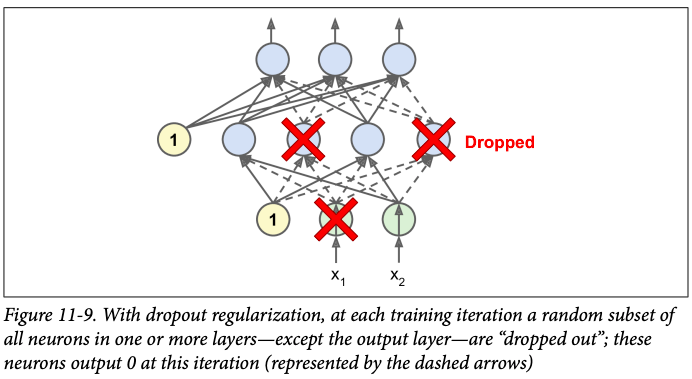

- Neurons trained with dropouts cannot co-adapt with their neighboring neurons: They have to be as useful as possible on their own
- They end up being less sensitive to slight changes in the inputs
- In the end, the model generalizes better
***
- Another way to look at it is, if there are $N$ neurons, we'll be training $2^N$ different NNs
- They won't be independent as they might share same weights, but still all these different NNs
    - With so many possibilities, we are highly unlikely to get same network twice
- The resulting NN can be seen as an averaging ensemble of all these smaller NNs

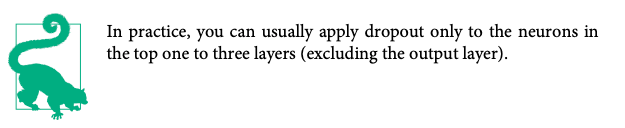

### Important Technical Detail about Dropouts
- Suppose $p=50%$
- During testing, a neuron would be connected to twice as many input neurons as it would (on avg) during training
- To compensate for this fact, we **need to multiply** each neuron's input's weights by 0.5 after training
- If we don't, each neuron will get a total input signal roughly TWICE as large as what the netowrk was trained on
    - Thus affecting the performance
- ***More Generally, after training, we need to multiply*** each neurons weight by $\left( 1 - p \right)$, known as the **keep probability**
- Alternatively, during training, we can divide each neuron's output by the keep probability
    - Not equivalent but works equally well\

### Keras Implementation
- We can use the dropout layer
- During training, it would randomly drop some inputs (by setting them to 0) and divide the remaining inputs by the keep probability
- After training, it does nothing at all, just passes the inputs to the next layer


In [89]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape = [28,28]),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(300, activation='elu', kernel_initializer='he_normal'),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(100, activation='elu', kernel_initializer='he_normal'),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(10, activation='softmax', kernel_initializer='glorot_uniform')
])

In [90]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 784)               0         
                                                                 
 dropout (Dropout)           (None, 784)               0         
                                                                 
 dense_41 (Dense)            (None, 300)               235500    
                                                                 
 dropout_1 (Dropout)         (None, 300)               0         
                                                                 
 dense_42 (Dense)            (None, 100)               30100     
                                                                 
 dropout_2 (Dropout)         (None, 100)               0         
                                                                 
 dense_43 (Dense)            (None, 10)              

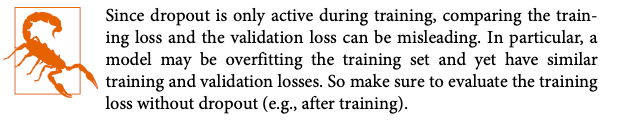

***
- If overfitting, increase dropout rate
- If undeffitting, reduce it
- Can also help to increase the rate for large layers and reduce it for small layers
- Can also try using dropout only on the last layer or the last 3 layers: If full dropout is too strong

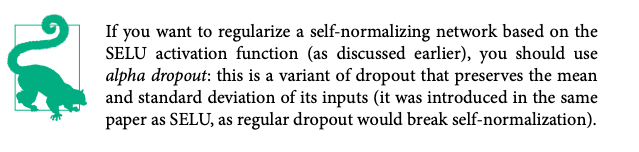

## Monte Carlo (MC) Dropout

- [Dropout as a Bayesian Approximation](https://homl.info/mcdropout)
- This paper gave a few solid reasons to use dropout:
    - Paper established a connection between dropout networks (NNs with a dropout layer before every weight layer) and approximate bayesian inference.
        - This gave a solid mathematical justification
    - The author introduced a powerful technique called MC dropout which can boost the performance of any trained dropout network without having to retrain it or even modify it at all
        - This provides a much better measure of the model's uncertainty and is also amazingly simple to implement

In [91]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 784)               0         
                                                                 
 dropout (Dropout)           (None, 784)               0         
                                                                 
 dense_41 (Dense)            (None, 300)               235500    
                                                                 
 dropout_1 (Dropout)         (None, 300)               0         
                                                                 
 dense_42 (Dense)            (None, 100)               30100     
                                                                 
 dropout_2 (Dropout)         (None, 100)               0         
                                                                 
 dense_43 (Dense)            (None, 10)              

In [95]:
model.compile(optimizer='rmsprop', 
              metrics='accuracy', 
              loss='sparse_categorical_crossentropy')

In [93]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]


In [96]:
history = model.fit(X_train, y_train, 
          epochs=30, 
          validation_data=[X_valid, y_valid])

Epoch 1/30
1719/1719 [==============================] - 20s 7ms/step - loss: 0.6076 - accuracy: 0.7819 - val_loss: 0.4132 - val_accuracy: 0.8542
Epoch 2/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4719 - accuracy: 0.8287 - val_loss: 0.3718 - val_accuracy: 0.8678
Epoch 3/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4366 - accuracy: 0.8416 - val_loss: 0.3994 - val_accuracy: 0.8572
Epoch 4/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4147 - accuracy: 0.8500 - val_loss: 0.3436 - val_accuracy: 0.8786
Epoch 5/30
1719/1719 [==============================] - 14s 8ms/step - loss: 0.4028 - accuracy: 0.8541 - val_loss: 0.3527 - val_accuracy: 0.8720
Epoch 6/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3954 - accuracy: 0.8580 - val_loss: 0.3328 - val_accuracy: 0.8812
Epoch 7/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3898 - accuracy: 0.8602 - val_loss: 0.3325 - val_accur

### MC Dropout in Keras

- model() gives us the raw output (without applying the activation)
- model.predict() gives us the pre-processed output (will apply the activation)

In [102]:
tf.random.set_seed(42)  # extra code – for reproducibility

y_probs = np.stack([model(X_test, training=True) for sample in range(100)])

y_proba = y_probs.mean(axis=0)


- We just made 100 predictions over the test set setting ```training=True``` to ensure that the Dropout layerss are active
- Then, we stacked the results using np.stack
- After which, we calculate the mean "column-wise"


In [105]:
model.predict(X_test[:1]).round(3)


1/1 [==============================] - 1s 885ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [107]:
y_proba[0].round(3)

array([0.  , 0.02, 0.  , 0.  , 0.  , 0.09, 0.  , 0.  , 0.  , 0.89],
      dtype=float32)

In [109]:
y_probs.shape # Axis 0 is the one with 100 dims

(100, 10000, 10)

- After averaging over the first dimension, we got the shape which we would expect with a single prediction
- In short ***MC Dropout is averaging multiple predictions with dropout***
- This is generally MORE RELIABLE

In [114]:
print(model.predict(X_test[0]).round(3))
print(y_proba[0].round(3))

1/1 [==============================] - 0s 130ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
[0.   0.02 0.   0.   0.   0.09 0.   0.   0.   0.89]


In [116]:
class_names[9]

'Ankle boot'

- We can see that the normal prediction would tell us certainly that the image belongs to the 10th class (ankle boots)
- Only when we use MC Dropout, we realise that it is not certain with it in the raw output

In [120]:
y_proba[0].std(axis=0)

0.2646885

In [124]:
y_proba.argmax(axis=1)

array([9, 2, 1, ..., 8, 1, 5])

In [125]:
y_pred = y_proba.argmax(axis=1)
accuracy = (y_pred == y_test).sum() / len(y_test)
accuracy


0.7415

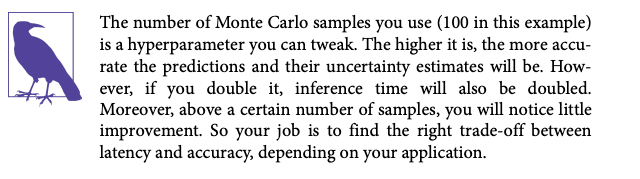

- If our model contains other layers that behave in a special way during training (such as BN layer), then we should not use ```training=True``` like we did
- Instead, we should replace the dropout layers with the following MCDropout layer:


In [126]:
class MCDropout(tf.keras.layers.Dropout):
    def call(self, inputs, training=None):
        return super().call(inputs, training=True)
    

In [127]:
# extra code – shows how to convert Dropout to MCDropout in a Sequential model
Dropout = tf.keras.layers.Dropout
mc_model = tf.keras.Sequential([
    MCDropout(layer.rate) if isinstance(layer, Dropout) else layer
    for layer in model.layers
])
mc_model.set_weights(model.get_weights())



In [128]:
mc_model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 784)               0         
                                                                 
 mc_dropout (MCDropout)      (None, 784)               0         
                                                                 
 dense_41 (Dense)            (None, 300)               235500    
                                                                 
 mc_dropout_1 (MCDropout)    (None, 300)               0         
                                                                 
 dense_42 (Dense)            (None, 100)               30100     
                                                                 
 mc_dropout_2 (MCDropout)    (None, 100)               0         
                                                                 
 dense_43 (Dense)            (None, 10)              

### Final Note on MC Dropout
- Similarly, we can define a class ```MCAlphaDropout``` by subclassing ```AlphaDropout``` instead when 
- For when we want to use other special layers like BN layers
- MC Dropout is  a fantastic technique that boosts dropout models and provide better uncertainty estimates


## Max-Norm Regularization


- For each neuron, it constraints the weights $w$ of the incoming connection such that:
$$
\lVert w \rVert_2 \le r
$$
- Here, $\lVert \cdot \rVert_2$ represents the $\ell_2$ norm
- And $r$ is the HP to tune
- Max-norm regularization does not add a regularization loss to the loss function
- Instead, it is typically implemented by computing $\lVert w \rVert_2$ after each training step and then rescaling $w$ if needed using:

$$
\\
w := w \dfrac{r}{\lVert w \rVert_2}
$$

- Reducing $r$ increases the amount of regularization
- Max-norm can also help alleviate the unstable gradient problem (if we are not using BN)

### Max-Norm in Keras
- This regularization is a weight constraint technique, hence we make use of the ```kernel_constraint``` parameter while creating the layer

In [131]:
layer = keras.layers.Dense(100, activation='elu',
                   kernel_initializer='he_normal',
                   kernel_constraint=keras.constraints.MaxNorm(1.) # can also use keras.constraints.max_norm(1.)
                  )

In [134]:
layer.get_config()

{'name': 'dense_46',
 'trainable': True,
 'dtype': 'float32',
 'units': 100,
 'activation': 'elu',
 'use_bias': True,
 'kernel_initializer': {'class_name': 'HeNormal', 'config': {'seed': None}},
 'bias_initializer': {'class_name': 'Zeros', 'config': {}},
 'kernel_regularizer': None,
 'bias_regularizer': None,
 'activity_regularizer': None,
 'kernel_constraint': {'class_name': 'MaxNorm',
  'config': {'max_value': 1.0, 'axis': 0}},
 'bias_constraint': None}

- After each training iteration, the model's fit() method will call the object returned by max_norm(), passing it the layer's weights and getting scaled weights in return
- These scaled weights are then used to replace the layer's weights

- The max_norm() constraint has an ```axis``` argument set to 0 by default
    - A dense layer usually has weights of the shape *[number of inputs, number of neurons]*
    - So, by default, the max_norm will be applied independently to each neuron's weight vector
    - When using CNN, we must make sure to set the correct axis(usually axis=[0,1,2])

# Summary
- Configuration that requires minimal to no HP tuning

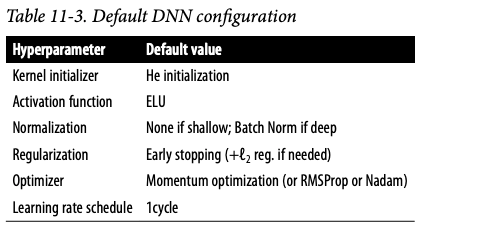

***

- Configuration that can be used with networks built with just stacking dense layers
    - They can self-normalize using the appropritate activation function (SELU)
    
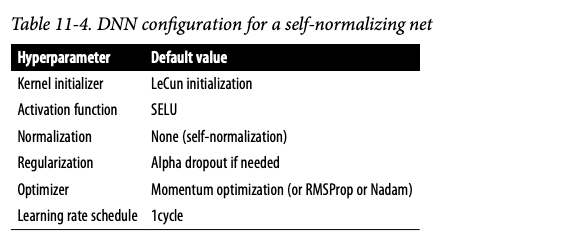

- Don't forget to normalize the input features
***

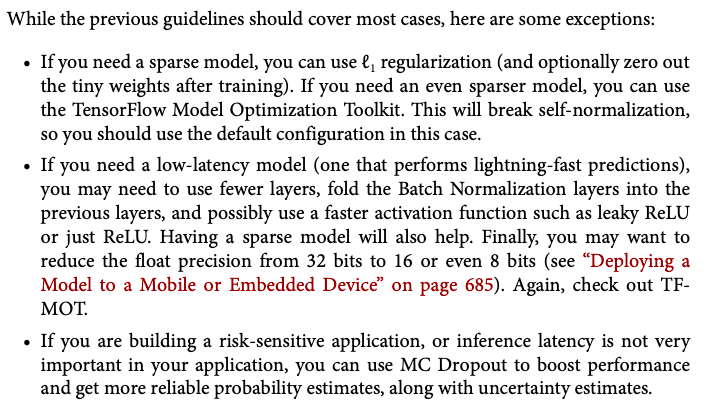


# Exercise Questions

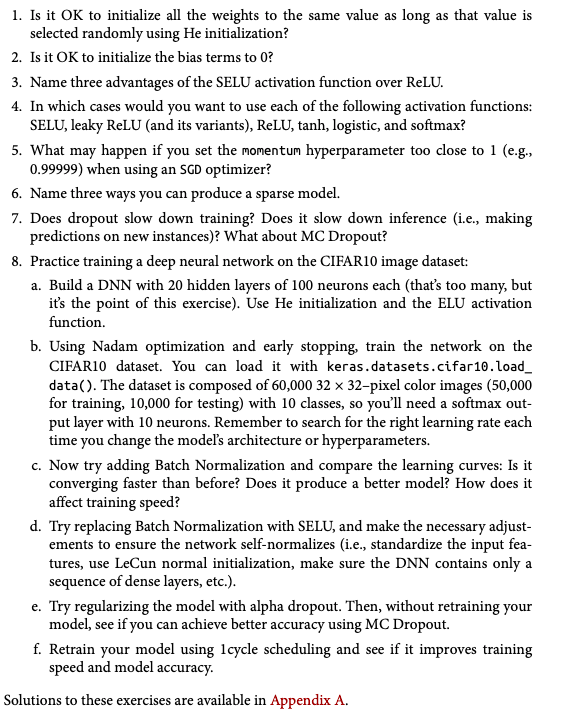